In [179]:
!pip install -q scikit-plot
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install mglearn
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
data=pd.read_csv('/content/pokemon_Classification - pokemon_Classification.csv')
print(data.head())

   defense  hp        name  sp_attack  sp_defense  speed  type1
0       49  45   Bulbasaur         65          65     45  grass
1       63  60     Ivysaur         80          80     60  grass
2      123  80    Venusaur        122         120     80  grass
3       43  39  Charmander         60          50     65   fire
4       58  58  Charmeleon         80          65     80   fire


In [90]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   defense     361 non-null    int64 
 1   hp          361 non-null    int64 
 2   name        361 non-null    object
 3   sp_attack   361 non-null    int64 
 4   sp_defense  361 non-null    int64 
 5   speed       361 non-null    int64 
 6   type1       361 non-null    object
dtypes: int64(5), object(2)
memory usage: 19.9+ KB
None


In [91]:
data.isnull().sum()

defense       0
hp            0
name          0
sp_attack     0
sp_defense    0
speed         0
type1         0
dtype: int64

In [92]:
data['type1'].value_counts()

water       64
normal      55
bug         34
grass       33
fire        26
psychic     22
rock        20
electric    19
poison      18
ground      16
fighting    13
dark         9
ghost        8
fairy        7
ice          7
steel        6
dragon       4
Name: type1, dtype: int64

In [95]:
x=data.drop(['name', 'type1'], axis=1)
y=data['type1']

In [96]:
corr=x.corr()
corr.style.background_gradient(cmap='coolwarm')

,defense,hp,sp_attack,sp_defense,speed
defense,1.000000,0.152554,0.197841,0.461969,-0.014121
hp,0.152554,1.000000,0.289594,0.386107,0.089382
sp_attack,0.197841,0.289594,1.000000,0.485989,0.441842
sp_defense,0.461969,0.386107,0.485989,1.000000,0.300840
speed,-0.014121,0.089382,0.441842,0.300840,1.000000


In [167]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)

From the above map, it can observed that there is no signifiant correlation between any 2 features.

In [160]:
features=[]
features=data.drop(['type1'], axis=1)
label_encoder=LabelEncoder()
label=data['type1']
label=label_encoder.fit_transform(label)
y=label

NAIVE BAYES CLASSIFIER

In [164]:
model_name='Naive Bayes Classifier'
nbClassifier=MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
nbClassifier.fit(x_train, y_train)
y_pred_nb=nbClassifier.predict(x_test)
y_pred_nb

array([ 0,  8, 14, 15, 16, 11, 11, 16, 14, 14, 11, 16,  4, 11, 11,  4, 15,
       11, 16,  8,  9,  3,  4, 15,  0,  0,  8, 13,  4, 16,  8, 16, 11,  6,
        6,  3,  3,  4, 11, 11,  8,  0, 16,  3, 11,  3, 15,  0, 11,  3,  5,
       14,  3,  0, 15,  3, 11,  0, 15,  3,  1, 16,  8, 14, 11, 11,  3, 16,
       11, 11,  4,  1,  8])

In [170]:
accuracy_score(y_test, y_pred_nb)

0.1232876712328767

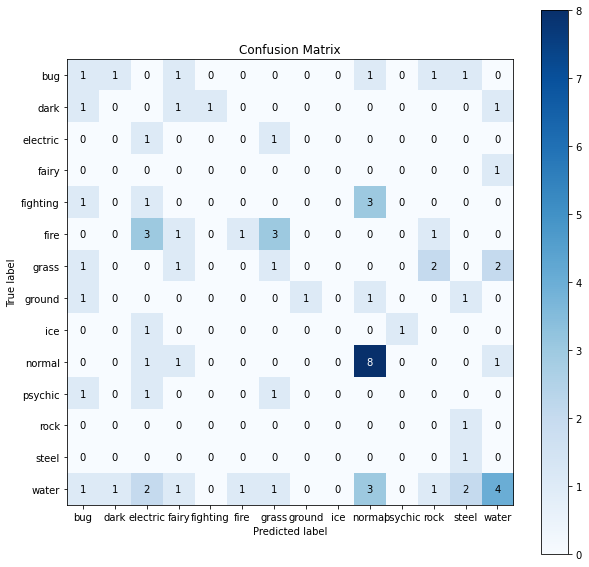

In [166]:
y_test1=label_encoder.inverse_transform(y_test)
y_pred_nb1=label_encoder.inverse_transform(y_pred_nb)
skplt.metrics.plot_confusion_matrix(y_test1, y_pred_nb1, figsize=(10,10))
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_nb))

LOGISTIC REGRESSION

In [105]:
model_name="Logistic Regression Classifier"
lrClassifier=LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000)
lrClassifier.fit(x_train, y_train)
y_pred_lrc=lrClassifier.predict(x_test)
y_pred_lrc

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([ 0,  8, 16,  0, 16, 16,  0, 16, 14, 16, 11, 16,  4, 11, 13,  8, 15,
       11,  0,  8,  0, 11,  4,  0,  0, 16,  8, 13,  4,  0,  8, 16, 11, 11,
       16, 13, 11,  4, 11, 11,  8, 11, 16,  3, 11, 11, 14, 16, 11,  3,  5,
       16, 11, 11, 14, 11, 11,  0, 15,  3,  8, 16,  8, 14, 11, 11,  3, 16,
       11, 11, 16, 14,  8])

In [106]:
accuracy_score(y_test, y_pred_lrc)

0.2876712328767123

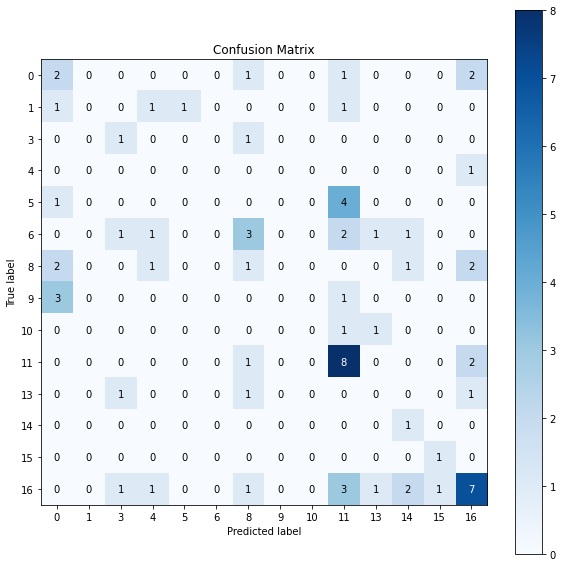

In [107]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lrc, figsize=(10,10))
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_lrc))

KNN CLASSIFIER

In [108]:
model_name="K-Nearest Neighbor Classifier"
knnClassifier=KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
#knnClassifier=KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
knnClassifier.fit(x_train, y_train)
y_pred_knn=knnClassifier.predict(x_test)
y_pred_knn

array([12,  8,  4, 14,  5,  4,  8,  8, 16,  8, 16, 16,  8, 11, 11,  8,  0,
       16,  5,  6,  9,  3,  4, 14,  2, 16,  3,  1,  8,  0,  4,  2, 12,  5,
        6,  1, 11,  8, 12, 11,  8,  0, 11, 11, 11, 11, 14,  1, 11,  3,  0,
       12,  6,  3, 15, 11, 12, 11,  0,  3,  8,  8,  3,  6,  0, 11,  6, 16,
       11, 12,  5, 16,  6])

In [109]:
accuracy_score(y_test, y_pred_knn)

0.1917808219178082

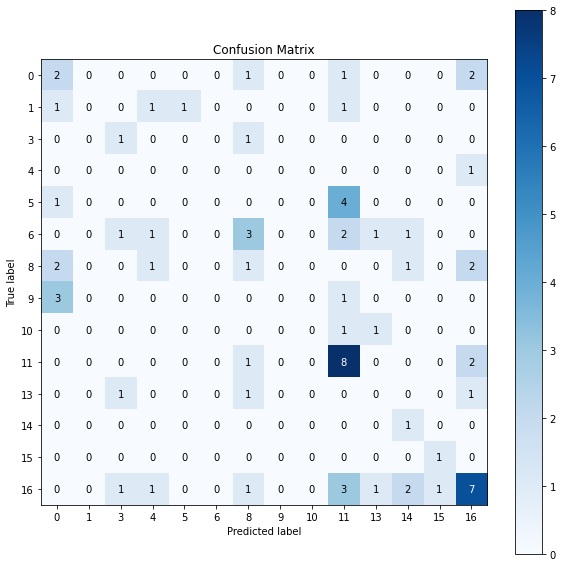

In [110]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(10,10))
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred_knn))

SUPPORT VECTOR CLASSIFIER

LINEAR SVC

In [176]:
lsvm=LinearSVC()
lsvm=lsvm.fit(x_train, y_train)
y_pred_lsvm=lsvm.predict(x_test)
y_pred_lsvm

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


array([16, 16, 16, 16, 16, 16,  6, 16, 16, 16, 16, 16,  6, 16, 16, 16,  6,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  6, 16, 16,  6, 16, 16,
       16, 16, 16, 16, 16, 16,  6, 16,  6,  6,  6, 16,  6, 16,  6, 16, 16,
        6, 16, 16,  6, 16, 11, 16, 16,  6,  6, 16, 16, 16, 16, 16,  6,  6,
       16,  6, 16,  6,  6])

In [113]:
print(lsvm.score(x_train, y_train))
print(lsvm.score(x_test, y_test))

0.07291666666666667
0.0410958904109589


NON-LINEAR SVC

In [114]:
poly_svc=SVC(kernel='poly', degree=3, C=10, max_iter=10_000, random_state=2)
poly_svc.fit(x_train, y_train)
y_pred_psvc=poly_svc.predict(x_test)
y_pred_psvc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


array([ 0,  6, 16,  0, 16, 16, 16, 16, 12,  0, 16, 16,  4, 11,  4,  8, 15,
       16, 16,  6,  0, 11,  4, 16,  0,  5,  8,  0,  4,  0,  8,  8, 11,  6,
        6,  7, 11,  8, 11, 11,  8, 11, 16,  3, 11, 11, 14, 11,  0, 13, 16,
       16,  6,  0, 14,  3, 11,  0, 14,  3,  8, 16,  8, 14, 16, 12,  6, 16,
       11, 10, 16, 16,  8])

In [115]:
print(poly_svc.score(x_train, y_train))
print(poly_svc.score(x_test, y_test))

0.6354166666666666
0.2602739726027397


In [ ]:
y_test1=label_encoder.inverse_transform(y_test)
y_pred_psvc1=label_encoder.fit_transform(y_pred_psvc)
skplt.metrics.plot_confusion_matrix(y_test1, y_pred_psvc1, figsize=(10,10))

LINEAR DISCRIMINANT ANALYSIS

In [118]:
lda=LinearDiscriminantAnalysis()
lda=lda.fit(x_train, y_train)
y_pred_lda=lda.predict(x_test)
y_pred_lda
print(np.unique(y_pred_lda, return_counts=True))

(array([ 0,  3,  5,  8,  9, 11, 13, 14, 15, 16]), array([ 5,  2,  1, 11,  2, 18,  3,  6,  2, 23]))


In [119]:
print(lda.priors_)

[0.09722222 0.01736111 0.01388889 0.05902778 0.02083333 0.02777778
 0.05902778 0.02777778 0.09027778 0.04166667 0.01736111 0.15277778
 0.0625     0.06597222 0.06597222 0.01736111 0.16319444]


In [120]:
print(lda.means_)

[[ 70.14285714  54.17857143  47.14285714  67.10714286  61.78571429]
 [ 58.4         63.          96.          60.4         91.2       ]
 [ 78.75        67.          82.5         81.25        70.        ]
 [ 58.17647059  56.47058824  91.17647059  71.17647059  87.64705882]
 [ 62.33333333  65.83333333  63.33333333  73.33333333  35.83333333]
 [ 69.625       69.875       46.875       81.875       64.75      ]
 [ 65.11764706  66.23529412  84.35294118  74.05882353  74.29411765]
 [ 68.125       45.375       89.5         75.75        70.        ]
 [ 64.53846154  64.          80.61538462  69.69230769  61.96153846]
 [ 85.83333333  61.66666667  48.33333333  61.66666667  59.58333333]
 [ 61.          71.          70.          72.          66.        ]
 [ 56.20454545  81.40909091  57.52272727  62.31818182  66.65909091]
 [ 67.44444444  68.38888889  60.33333333  63.27777778  61.83333333]
 [ 56.89473684  71.57894737  90.31578947  83.73684211  76.84210526]
 [ 99.42105263  63.26315789  62.73684211  70.736

In [121]:
print(lda.coef_)

[[ 0.00957071 -0.0088585  -0.03618589  0.00898139  0.00888399]
 [-0.011288   -0.00848846  0.04979331 -0.02954199  0.02219068]
 [ 0.00291411 -0.01014579  0.02092621  0.00979892 -0.00546274]
 [-0.02259328 -0.02177522  0.04084931  0.00197212  0.01395996]
 [-0.02386947 -0.00796407  0.01524709  0.03011692 -0.05222998]
 [-0.00409049  0.00689961 -0.05113956  0.03464306  0.01117529]
 [-0.01409421 -0.00861467  0.02910205  0.00491093 -0.00097213]
 [-0.01490789 -0.04194128  0.05091957  0.01584764 -0.01655481]
 [-0.01363253 -0.01061415  0.03356067  0.00306894 -0.01841676]
 [ 0.04325312  0.0046723  -0.03813133 -0.02258252  0.01288324]
 [-0.01711231  0.00323741  0.00450044  0.01084064 -0.0035462 ]
 [-0.01101195  0.02783472 -0.02242699 -0.00727193  0.01214704]
 [ 0.0051739   0.00750278 -0.0110445  -0.00907494  0.00203018]
 [-0.03969385 -0.00836011  0.0369263   0.02954607 -0.00684154]
 [ 0.0530953  -0.00335171 -0.0121888  -0.02005026 -0.00442681]
 [ 0.14188289 -0.00031463 -0.04915014 -0.05774068  0.00

In [122]:
print(metrics.confusion_matrix(y_test, y_pred_lda))

[[0 0 0 0 0 0 1 0 0 1 0 1 0 3]
 [2 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 1 1 0 3]
 [1 0 0 0 0 0 2 0 0 0 0 1 0 3]
 [1 0 0 0 0 0 0 2 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 8 0 0 0 2]
 [0 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 2 0 0 3 1 1 1 8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         9
           8       0.18      0.29      0.22         7
           9       1.00      0.50      0.67         4
          10       0.00      0.00      0.00         2
          11       0.44 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.classification_report(y_test, y_pred_lda))

QUADRATIC DISCRIMINANT ANALYSIS

In [123]:
qda=QuadraticDiscriminantAnalysis()
qda=qda.fit(x_train, y_train)
y_pred_qda=qda.predict(x_test)
y_pred_qda
print(np.unique(y_pred_qda, return_counts=True))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


array([ 8,  8,  8,  9, 12, 16, 12, 12, 16,  8, 11, 12, 14, 11, 11,  8, 14,
       11,  7,  8,  9,  3,  0, 14,  9,  0,  8, 13, 14, 12,  8, 16, 12,  8,
        8, 13,  9,  8, 12, 11,  8, 11, 12,  0, 16, 12, 14,  9, 11, 13, 16,
       12,  8,  0, 14,  8, 16, 16, 14,  3,  8,  8,  8, 14, 12, 12, 11, 16,
       11, 16,  4, 16,  8])

In [124]:
print(qda.priors_)

[0.09722222 0.01736111 0.01388889 0.05902778 0.02083333 0.02777778
 0.05902778 0.02777778 0.09027778 0.04166667 0.01736111 0.15277778
 0.0625     0.06597222 0.06597222 0.01736111 0.16319444]


In [125]:
print(qda.means_)

[[ 70.14285714  54.17857143  47.14285714  67.10714286  61.78571429]
 [ 58.4         63.          96.          60.4         91.2       ]
 [ 78.75        67.          82.5         81.25        70.        ]
 [ 58.17647059  56.47058824  91.17647059  71.17647059  87.64705882]
 [ 62.33333333  65.83333333  63.33333333  73.33333333  35.83333333]
 [ 69.625       69.875       46.875       81.875       64.75      ]
 [ 65.11764706  66.23529412  84.35294118  74.05882353  74.29411765]
 [ 68.125       45.375       89.5         75.75        70.        ]
 [ 64.53846154  64.          80.61538462  69.69230769  61.96153846]
 [ 85.83333333  61.66666667  48.33333333  61.66666667  59.58333333]
 [ 61.          71.          70.          72.          66.        ]
 [ 56.20454545  81.40909091  57.52272727  62.31818182  66.65909091]
 [ 67.44444444  68.38888889  60.33333333  63.27777778  61.83333333]
 [ 56.89473684  71.57894737  90.31578947  83.73684211  76.84210526]
 [ 99.42105263  63.26315789  62.73684211  70.736

In [127]:
print(metrics.confusion_matrix(y_test, y_pred_qda))

[[0 0 0 1 0 0 0 2 0 0 1 1 0 1 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 2 0 0 0 1]
 [0 0 1 0 0 0 0 6 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 2 0 0 0 1 0 1 0 2]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 3 4 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 4 2 0 4 2 0 3 0 2]]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         6
           1      0.000     0.000     0.000         4
           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000         1
           5      0.000     0.000     0.000         5
           6      0.000     0.000     0.000         9
           7      0.000     0.000     0.000         0
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
print(metrics.classification_report(y_test, y_pred_qda, digits=3))